In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go 
plt.style.use('ggplot')



In [24]:
stocks_df = pd.read_csv('stocks.csv')
stocks_df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [25]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


In [26]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'],format='%Y-%m-%d')

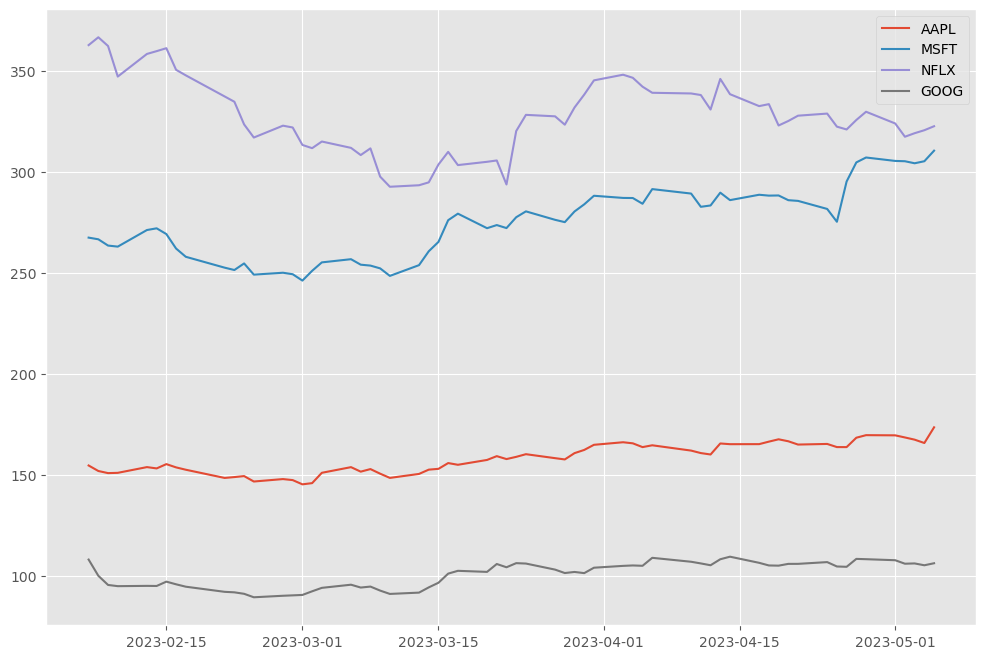

In [27]:
plt.figure(figsize=(12,8))
for ticket in stocks_df['Ticker'].unique():
    subset = stocks_df[stocks_df['Ticker'] == ticket]
    plt.plot(subset['Date'],subset['Close'])


plt.legend(stocks_df['Ticker'].unique())    
plt.show()


In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
def decomposition_plots(ticket:str):
    new_subset = stocks_df[stocks_df['Ticker']==ticket]
    result = seasonal_decompose(x=new_subset.Close,model='additive',period=5)
    plt.figure(figsize=(12,8))

    
    plt.subplot(3,1,1)
    plt.plot(new_subset.Close)
    
    plt.subplot(3,1,1)
    plt.plot(result.trend)
    plt.title(f'Trend And Actual Date {ticket}')
    
    plt.subplot(3,1,2)
    plt.plot(result.seasonal)
    plt.title(f'Seasonality {ticket}')
    
    plt.subplot(3,1,3)
    plt.plot(result.resid)
    plt.title(f'Residue {ticket}')
    
    plt.tight_layout()
    plt.show()

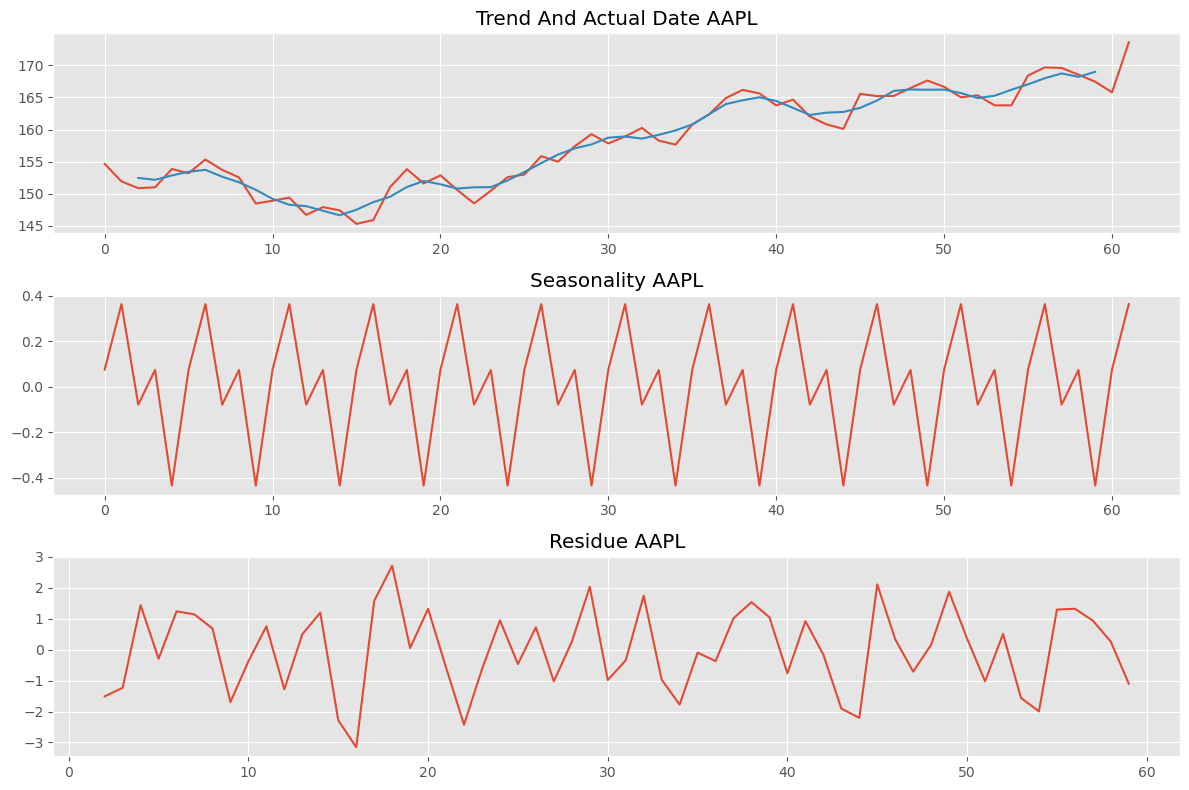

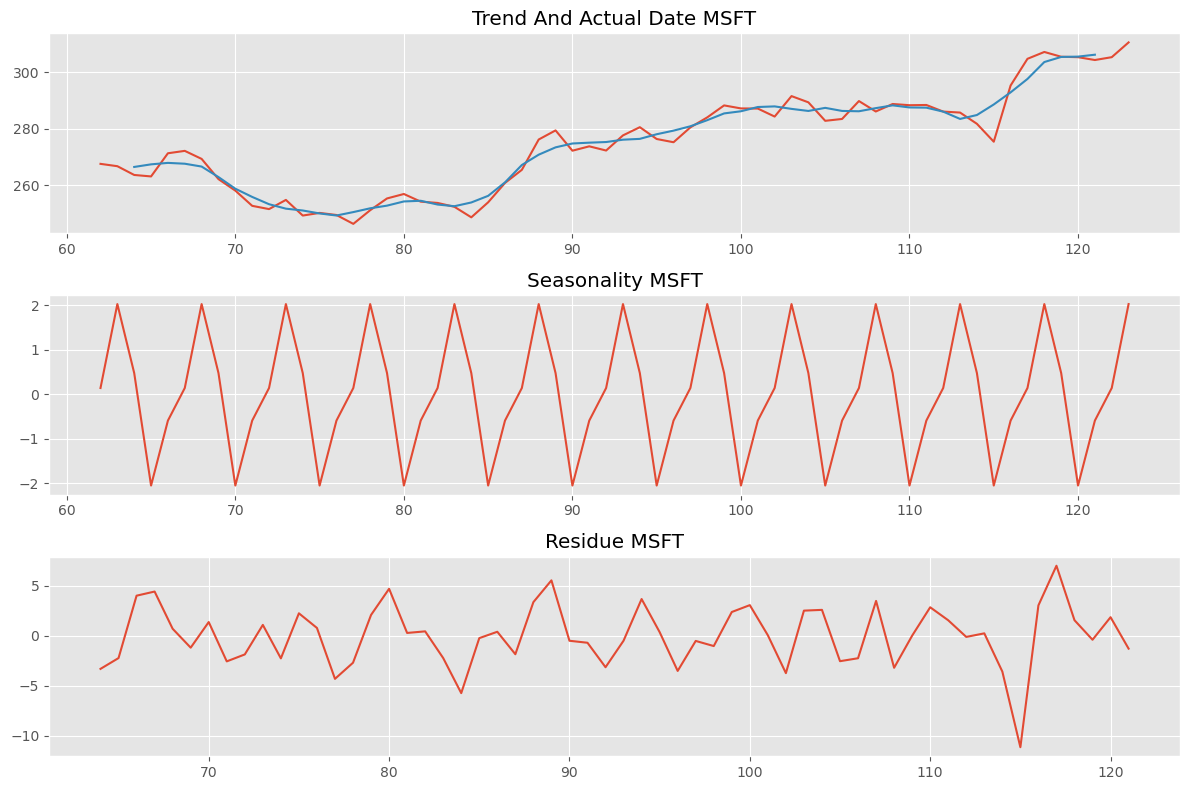

In [101]:
decomposition_plots(ticket='AAPL')
decomposition_plots(ticket='MSFT')

In [102]:
stocks_df.Ticker.unique()

array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

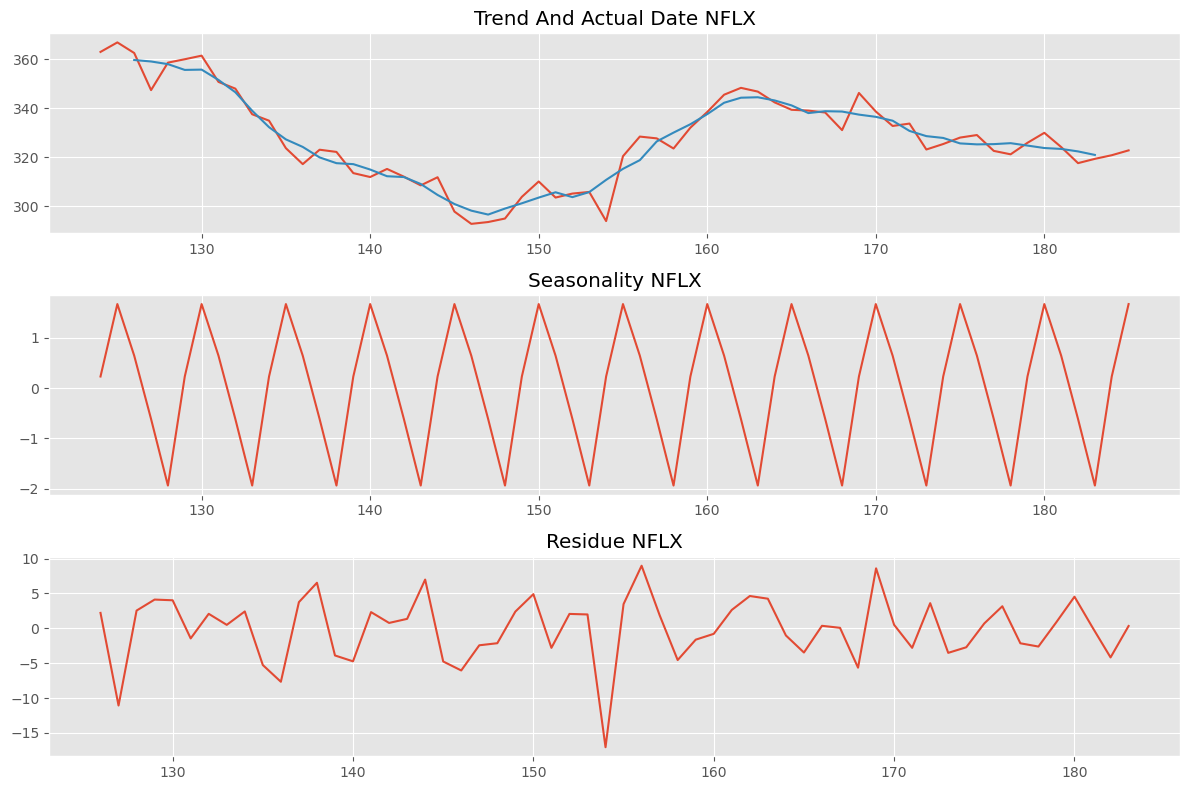

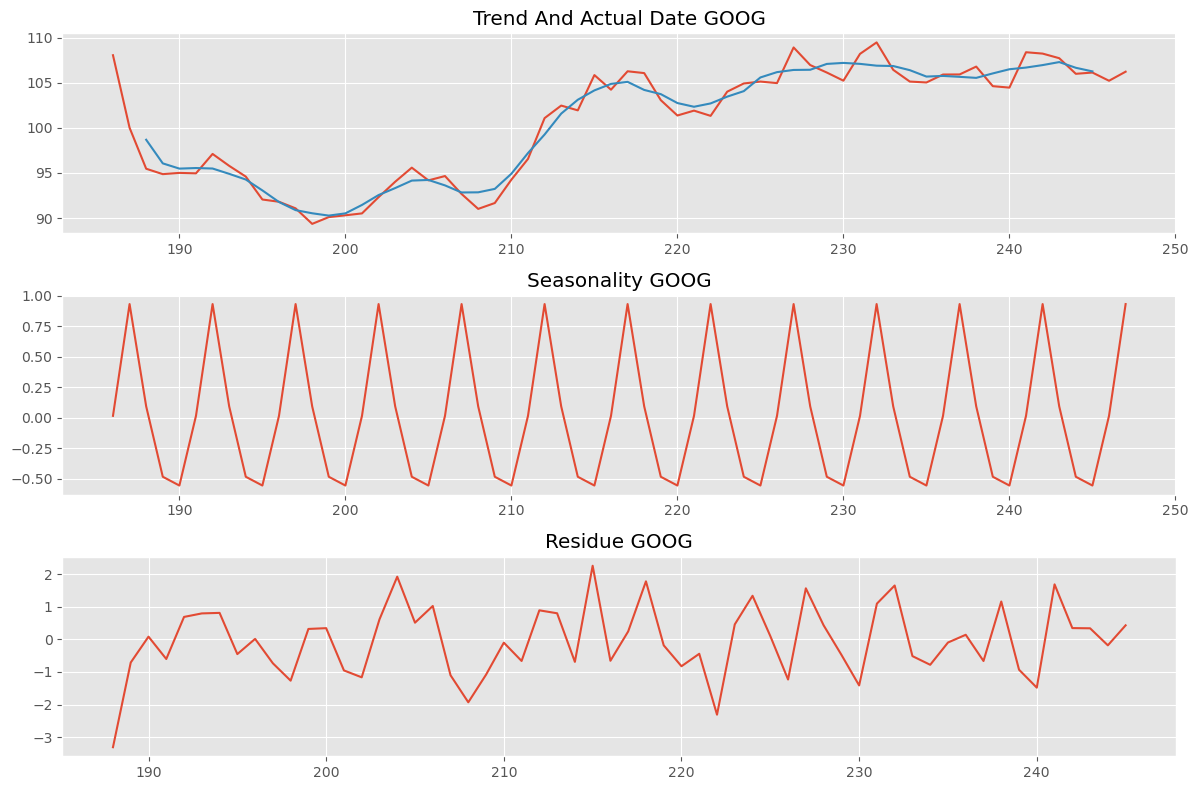

In [103]:
decomposition_plots(ticket='NFLX')
decomposition_plots(ticket='GOOG')


In [133]:
test = stocks_df[stocks_df['Ticker']=='NFLX']
series = test[['Close','Date']]
series.set_index('Date',inplace=True)


In [197]:
from statsmodels.tsa.exponential_smoothing.ets import ETSModel
def fit_model(ticket:str):
    test = stocks_df[stocks_df['Ticker']==ticket]
    series = test[['Close','Date']]
    series.set_index('Date',inplace=True)
    model = ETSModel(series['Close'],
                     error='add',trend='add', seasonal='add',
                     seasonal_periods=9,
                     damped_trend=True
                     )
    fit = model.fit(maxiter=10000,disp=False)
    series['Close'].plot(label=ticket)
    fit.fittedvalues.plot(label=f'{ticket} fitted')
    


/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


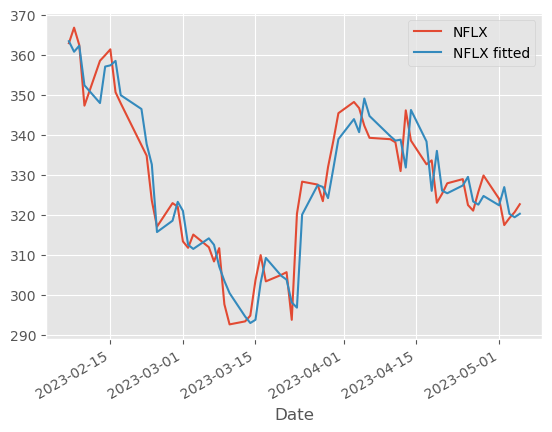

In [198]:
ticket=('NFLX')
fit_model(ticket)
plt.legend()


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         1 variables are exactly at the bounds

At iterate    0    f=  2.70229D+00    |proj g|=  8.99900D-01

At iterate    1    f=  2.36441D+00    |proj g|=  1.74394D-01

At iterate    2    f=  2.33780D+00    |proj g|=  1.48455D-01

At iterate    3    f=  2.30435D+00    |proj g|=  1.37535D-01

At iterate    4    f=  2.25988D+00    |proj g|=  1.65928D-01
  ys=-5.496E-03  -gs= 4.238E-02 BFGS update SKIPPED

At iterate    5    f=  2.20650D+00    |proj g|=  3.58867D-02

At iterate    6    f=  2.20532D+00    |proj g|=  3.42384D-02

At iterate    7    f=  2.19517D+00    |proj g|=  6.63936D-03

At iterate    8    f=  2.19470D+00    |proj g|=  4.43459D-03

At iterate    9    f=  2.19439D+00    |proj g|=  5.24500D-03

At iterate   10    f=  2.19386D+00    |proj g|=  4.73293D-03

At iterate   11    f=  2.19321D+00    |proj g|=  4.70246D-03

At iterate   12    f=  2.19270D+00  

/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been

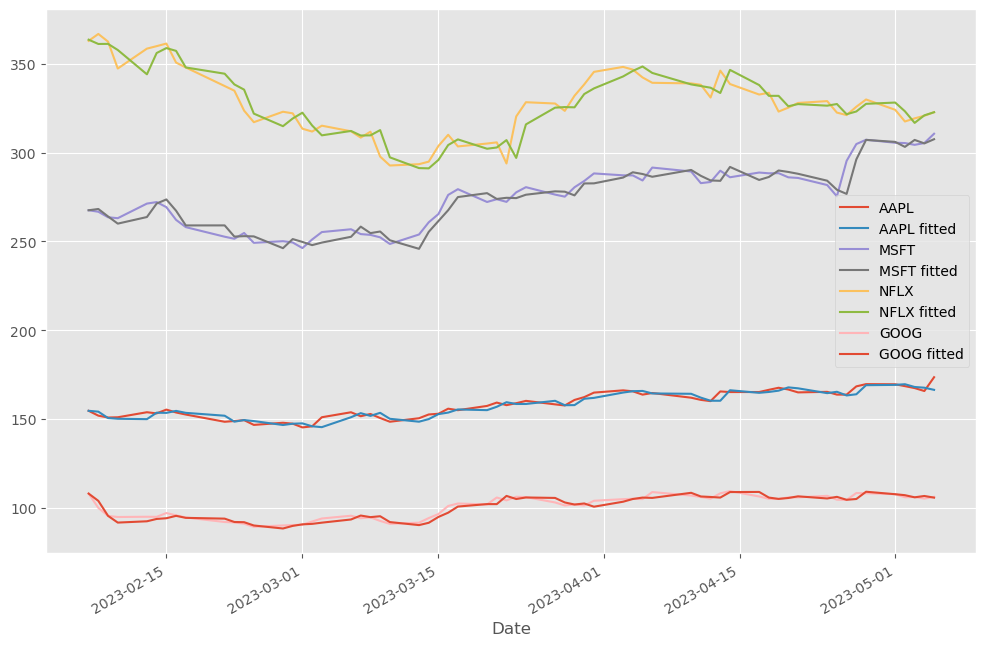

In [181]:
plt.figure(figsize=(12,8))
for ticket in stocks_df.Ticker.unique():
    fit_model(ticket)
plt.legend(loc= 7)

In [148]:
fit.predict()

Date
2023-02-07    363.601718
2023-02-08    361.191236
2023-02-09    361.239723
2023-02-10    357.798366
2023-02-13    344.103545
                 ...    
2023-05-01    328.209796
2023-05-02    323.287128
2023-05-03    316.756516
2023-05-04    321.004344
2023-05-05    322.762234
Length: 62, dtype: float64

In [154]:
forecasted_values = fit.forecast(steps=5)
list(forecasted_values)

/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


[321.34329149148226,
 320.0502675985296,
 318.60406009013434,
 320.6191927729833,
 322.58866541054084]

In [155]:
forecasted_df = pd.DataFrame(forecasted_values.values, index=pd.date_range(start=series.index[-1]+pd.Timedelta(days=1), periods=5, freq='D',name='Date'),columns=['Close'])


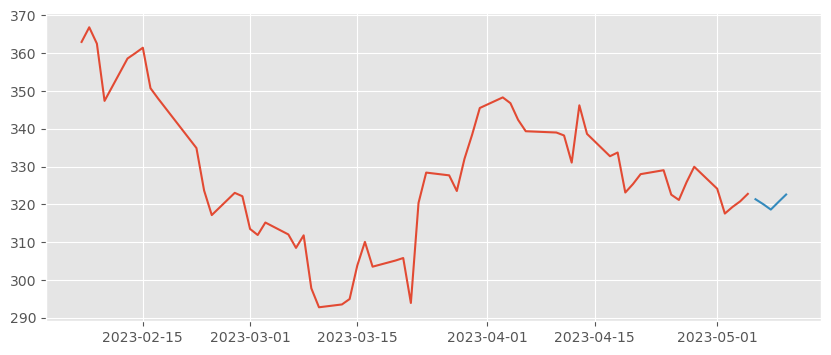

In [157]:
plt.figure(figsize=(10,4))
plt.subplot(1,1,1)
plt.plot(series.Close)

plt.plot(forecasted_df.Close,)

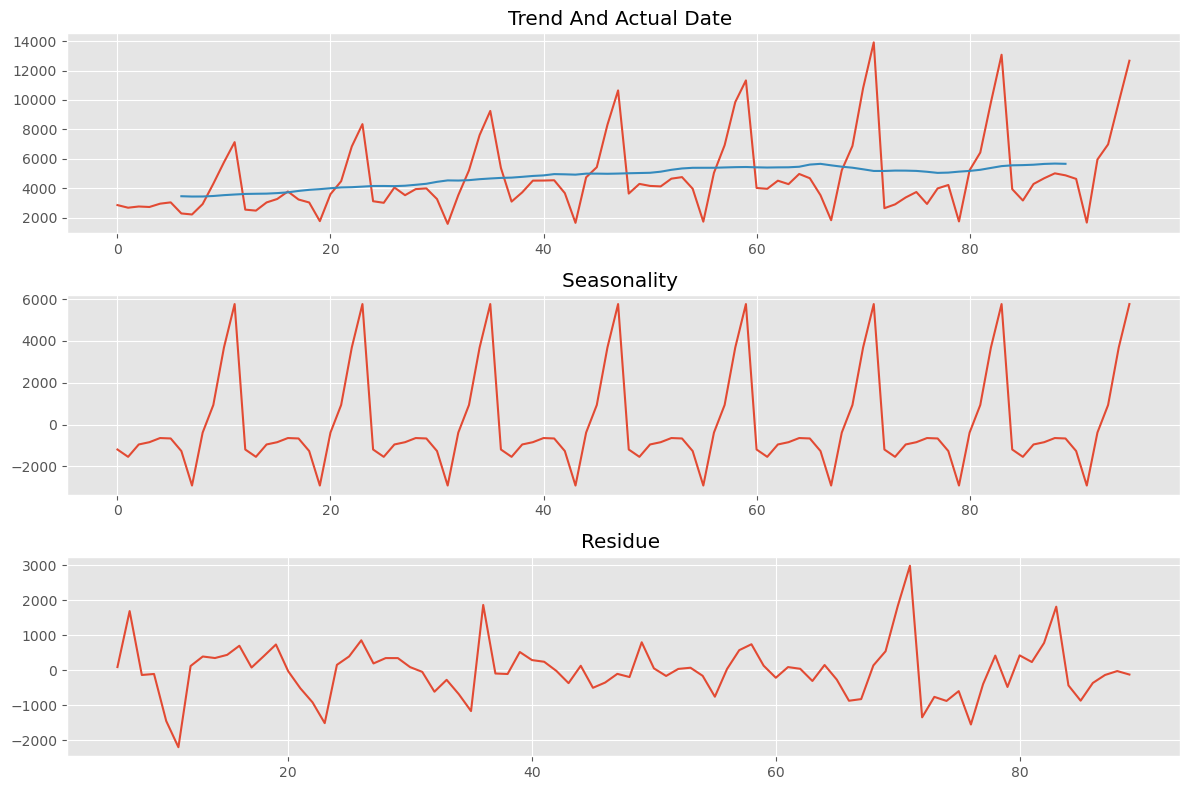

In [201]:
df = pd.read_excel('champagne-sales.xlsx')
df.rename(columns={'Champagne Sales':'Champagne_Sales'},inplace=True)

from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=df.Champagne_Sales,period=12)
plt.figure(figsize=(12,8))


plt.subplot(3,1,1)
plt.plot(df.Champagne_Sales)

plt.subplot(3,1,1)
plt.plot(result.trend)
plt.title('Trend And Actual Date ')

plt.subplot(3,1,2)
plt.plot(result.seasonal)
plt.title('Seasonality ')

plt.subplot(3,1,3)
plt.plot(result.resid)
plt.title('Residue ')

plt.tight_layout()
plt.show()

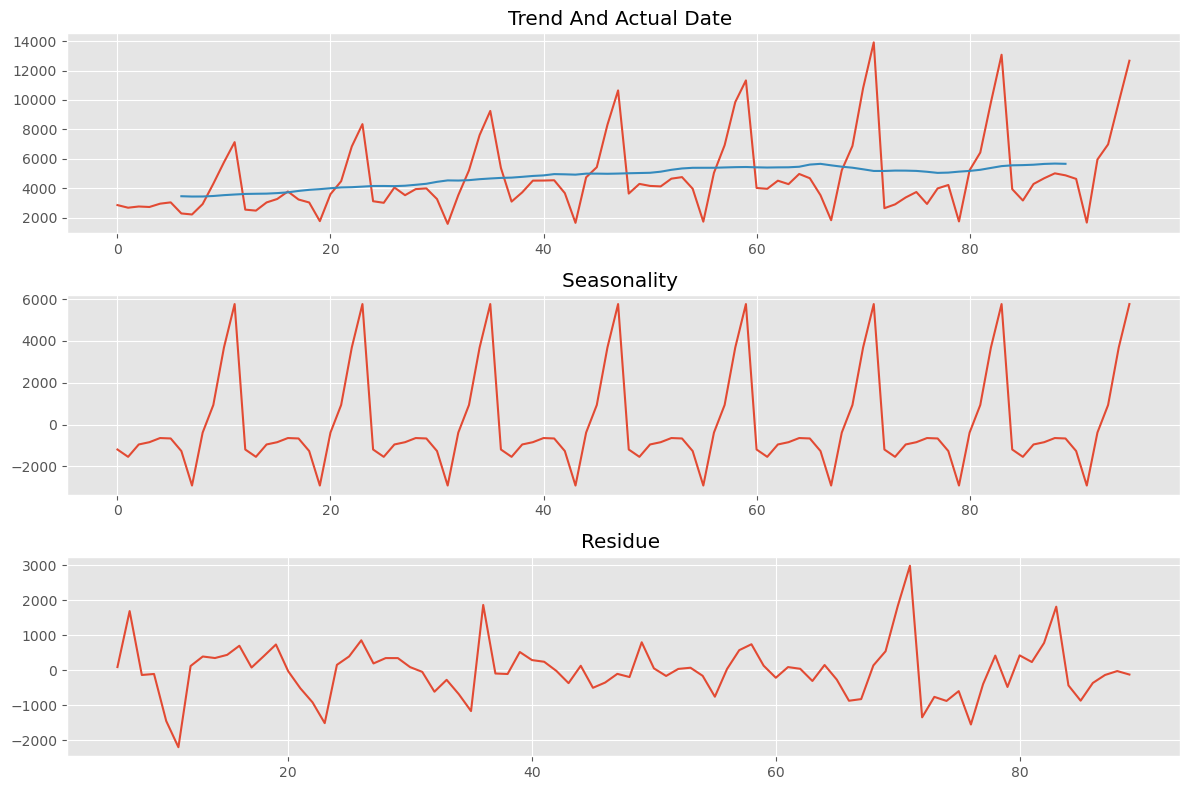

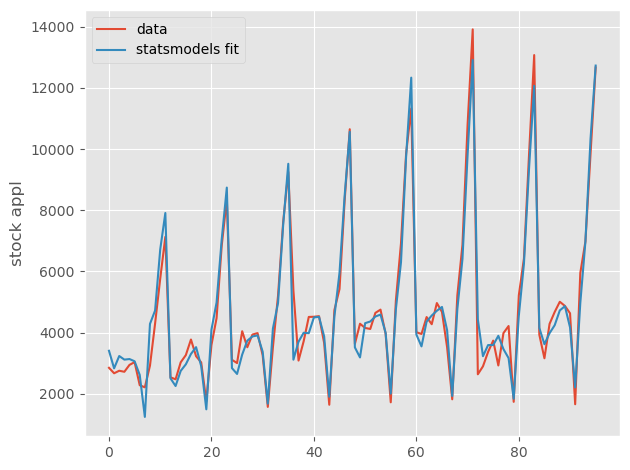

In [205]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x=df.Champagne_Sales,period=12)
plt.figure(figsize=(12,8))


plt.subplot(3,1,1)
plt.plot(df.Champagne_Sales)

plt.subplot(3,1,1)
plt.plot(result.trend)
plt.title('Trend And Actual Date ')

plt.subplot(3,1,2)
plt.plot(result.seasonal)
plt.title('Seasonality ')

plt.subplot(3,1,3)
plt.plot(result.resid)
plt.title('Residue ')

plt.tight_layout()
plt.show()

from statsmodels.tsa.exponential_smoothing.ets import ETSModel
model = ETSModel(df['Champagne_Sales'], trend='add', seasonal='mul', seasonal_periods=12,damped_trend=True) 
fit = model.fit(maxiter=10000,disp=False)
df['Champagne_Sales'].plot(label="data")
fit.fittedvalues.plot(label="statsmodels fit")
plt.ylabel("stock appl")

plt.legend()
plt.tight_layout()
plt.show()
